In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import resource
import sys

from IPython.display import display
from sympy import Symbol, exp, cos, lambdify, integrate

from ggqpy import construct_Chebyshev_quadratures
from ggqpy.functionfamiliy import Interval
from ggqpy.testproblems import example_problem, gen_poly_and_sing
from ggqpy.discretize import Discretizer
from ggqpy.compress import compress_sequence_of_functions, visualise_diagonal_dropoff, construct_A_matrix
from ggqpy.optimize import QuadOptimizer

resource.setrlimit(resource.RLIMIT_STACK, [0x10000000, resource.RLIM_INFINITY])
sys.setrecursionlimit(0x100000)

In [2]:
x = Symbol("x")
y = Symbol("y")
degree = 5
function_list_sym = [x**m*y**n for m in range(degree) for n in range(degree)] + [1j*np.random.normal()*x**m*y**n for m in range(degree) for n in range(degree)]
functions = [lambdify((x,y),phi,"numpy") for phi in function_list_sym]
disc = Discretizer()
N_disc = 10
x_disc,y_disc,w_disc,x_loc,y_loc = disc.naive_discretize2d(N_disc, 100, Interval(-1,1), Interval(-1,1))

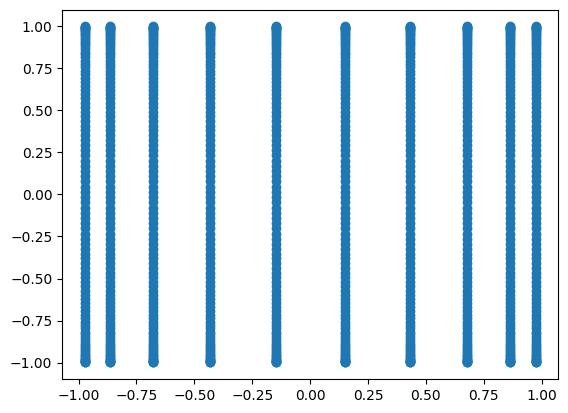

In [3]:
plt.scatter(x_disc,y_disc)

(1000, 25)


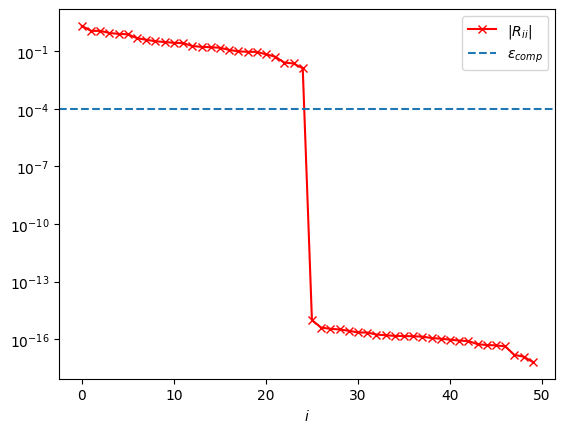

In [4]:
precision = 1e-4
U, rank = compress_sequence_of_functions(functions,(x_disc,y_disc),w_disc,precision)
print(U.shape)
A = construct_A_matrix((x_disc,y_disc),w_disc,functions)
visualise_diagonal_dropoff(A,precision)

In [5]:
(x_cheb,y_cheb),w_cheb = construct_Chebyshev_quadratures((x_disc,y_disc),w_disc,U)

[0.34242329+3.85514680e-16j 1.05104648-1.00549984e-16j
 0.32429903-1.27350850e-15j 1.08165525+2.00089177e-16j
 2.07085028-2.40680587e-15j 2.12722636-4.49637490e-16j
 1.07708363+4.41191737e-16j 2.28143766+2.63558620e-16j
 2.27668614+4.99222676e-16j 0.65736476+1.03777505e-15j
 0.7651172 +1.85728320e-15j 0.71146637+9.38189705e-17j
 2.34787812-1.77618061e-15j 1.10845067-8.39828141e-16j
 2.59242565-1.45173212e-15j 2.45521009+2.38897404e-16j
 2.12215063+9.50234340e-17j 2.08539937-1.18173597e-15j
 2.33308558+8.23345487e-16j 5.16078543-9.34587915e-17j
 4.67509946+7.79836497e-18j 4.94185329+2.93560578e-16j
 4.79856887-2.32001430e-15j 4.97679141-4.11800054e-15j
 5.38638499-2.77326501e-15j]


[-0.97390653  0.97390653 -0.97390653  0.97390653  0.97390653 -0.97390653
  0.67940957 -0.67940957  0.97390653 -0.97390653  0.97390653 -0.97390653
 -0.67940957  0.67940957  0.14887434  0.14887434  0.67940957 -0.67940957
  0.67940957  0.14887434  0.67940957 -0.67940957 -0.67940957 -0.14887434
  0.14887434]


/home/jakob/Documents/OneDriveDTU/10-semester/speciale/code/genquad-venv/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


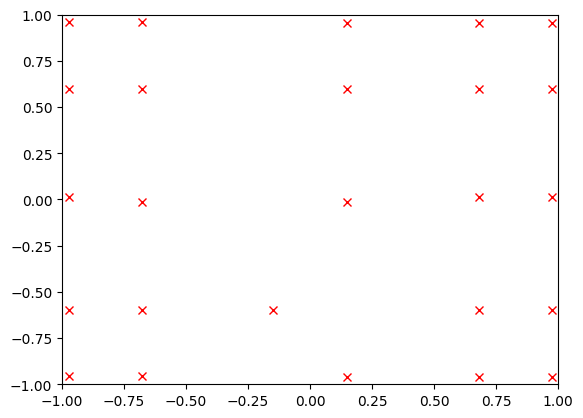

/home/jakob/Documents/OneDriveDTU/10-semester/speciale/code/genquad-venv/lib/python3.10/site-packages/matplotlib/collections.py:1448: ComplexWarning: Casting complex values to real discards the imaginary part
  else mpath.Path(np.asarray(seg, float))


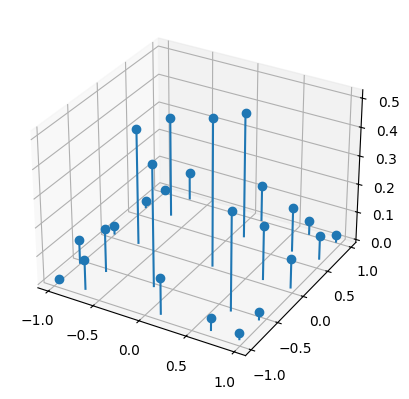

1.52230160237818e-14
1.59564387833875e-14
[0.00812463 0.02493804 0.0081101  0.02705015 0.08464232 0.08694659
 0.04632633 0.09812668 0.10392869 0.02686862 0.0312728  0.03247781
 0.10643742 0.0502499  0.12950116 0.12926958 0.15723642 0.15451341
 0.19306388 0.44410085 0.34639194 0.40894059 0.35554016 0.42826762
 0.51767433]


In [10]:
plt.plot(x_cheb,y_cheb,"rx")
plt.xlim(-1,1);
plt.ylim(-1,1);
print(x_cheb)
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
markerline, stemlines, baseline = ax.stem(x_cheb, y_cheb, w_cheb, basefmt=" ")
plt.show()

f = 3*x**3*y + y**4 + 1j*x**4*y**2
fl = lambdify((x,y),f,"numpy")
print(abs(integrate(f,(x,-1,1),(y,-1,1))    -   fl(x_disc,y_disc)@w_disc))
print(abs(integrate(f,(x,-1,1),(y,-1,1))    -   fl(x_cheb,y_cheb)@w_cheb))
print(w_cheb.real)

ValueError: cannot reshape array of size 1000 into shape (10,10)

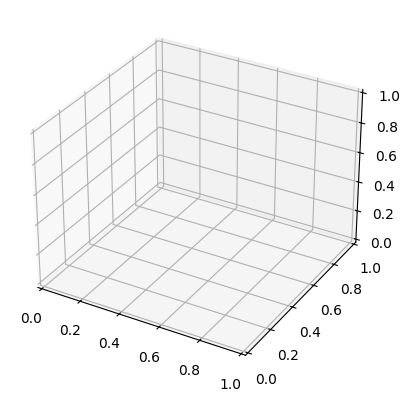

In [7]:
fig = plt.figure()
X,Y = np.meshgrid(x_loc,y_loc)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,functions[12](x_disc,y_disc).reshape(N_disc,N_disc))

[-0.84342779 -0.5        -0.84342779  1.31182637 -1.42274089 -1.31182637
  1.74025415  1.74025415 -1.12246168  1.12246168 -1.48037266 -1.89343076
  1.89343076  1.27539608  1.39950046 -3.50899047  3.50899047 -0.01664637
  0.01664637  2.33384024  2.51984045  2.33384024 -1.77170367 -1.77170367
  2.55883751]


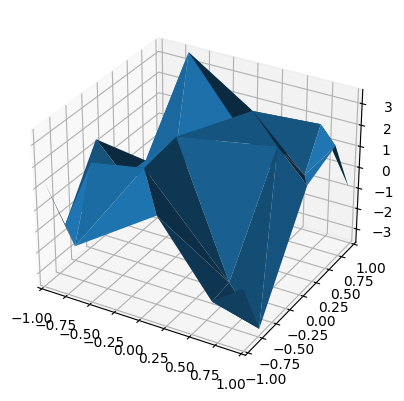

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x_cheb,y_cheb,U[0])
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
print(U[0])